In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
path = "data.txt"
with open(path, "r") as file:
    data = file.readlines()

print(data)

['0\n', '.x...\n', 'x.x..\n', '.x...\n', '.....\n', '.....\n', '\n', '0\n', 'xxx..\n', 'x.x..\n', 'xxx..\n', '.....\n', '.....\n', '\n', '0\n', 'xxxx.\n', 'x.xx.\n', 'xx.x.\n', 'xxxx.\n', '.....\n', '\n', '0\n', 'xxx..\n', 'x.x..\n', 'x.x..\n', 'xxx..\n', '.....\n', '\n', '0\n', '.x...\n', 'x.x..\n', 'x.x..\n', '.x...\n', '.....\n', '\n', '0\n', '.x...\n', 'x.x..\n', 'x.x..\n', 'xxx..\n', '.....\n', '\n', '0\n', '.x...\n', 'x.x..\n', 'x.x..\n', 'x.x..\n', '.x...\n', '\n', '0\n', 'xxxx.\n', 'x..x.\n', 'x..x.\n', 'xxxx.\n', '.....\n', '\n', '0\n', 'xxxx.\n', 'x..x.\n', 'x..x.\n', 'x..x.\n', 'xxxx.\n', '\n', '0\n', '.xx..\n', 'x..x.\n', 'x..x.\n', '.xx..\n', '.....\n', '\n', '0\n', '.xx..\n', 'x..x.\n', 'x..x.\n', 'x..x.\n', '.xx..\n', '\n', '0\n', '.xxx.\n', 'xx.xx\n', 'xx.xx\n', 'xx.xx\n', '.xxx.\n', '\n', '1\n', 'x....\n', 'x....\n', 'x....\n', 'x....\n', 'x....\n', '\n', '1\n', 'x....\n', 'x....\n', 'x....\n', 'x....\n', '.....\n', '\n', '1\n', 'x....\n', 'x....\n', 'x....\n', '.....\

In [3]:
# split teh data into individual samples
# data is in the shape of label followed by 5 lines of values
samples = []
for i in range(0, len(data), 7):
    label = data[i].strip()
    values = data[i+1:i+6]
    samples.append((label, values))

print(len(samples))
print(samples[0])

134
('0', ['.x...\n', 'x.x..\n', '.x...\n', '.....\n', '.....\n'])


In [4]:
dataset = []
for label, values in samples:
    if len(label)!=1 or len(values)<5:
        continue
    l = int(label)
    # convert matrix of strings to boolean matrix (.->0 and x->1)
    values = [[1 if c == 'x' else 0 for c in row.strip()] for row in values]
    dataset.append((l, values))

print(len(dataset))
print(dataset[0])

134
(0, [[0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])


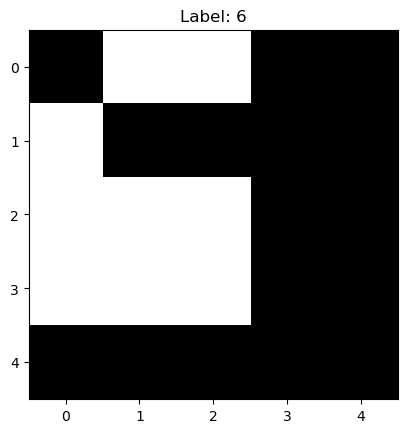

In [5]:
#plot a random sample 
randindex = np.random.randint(len(dataset))
label, values = dataset[randindex]
plt.imshow(values, cmap='gray')
plt.title(f"Label: {label}")
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X = [list(np.array(values).astype(bool).reshape(-1)) for label, values in dataset]
y = [label for label, values in dataset]

# X = np.array(X).astype(bool)
# y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))

107 27


train score 1.0
test score 1.0
Number of nodes in the tree: 129
Depth of the tree: 10


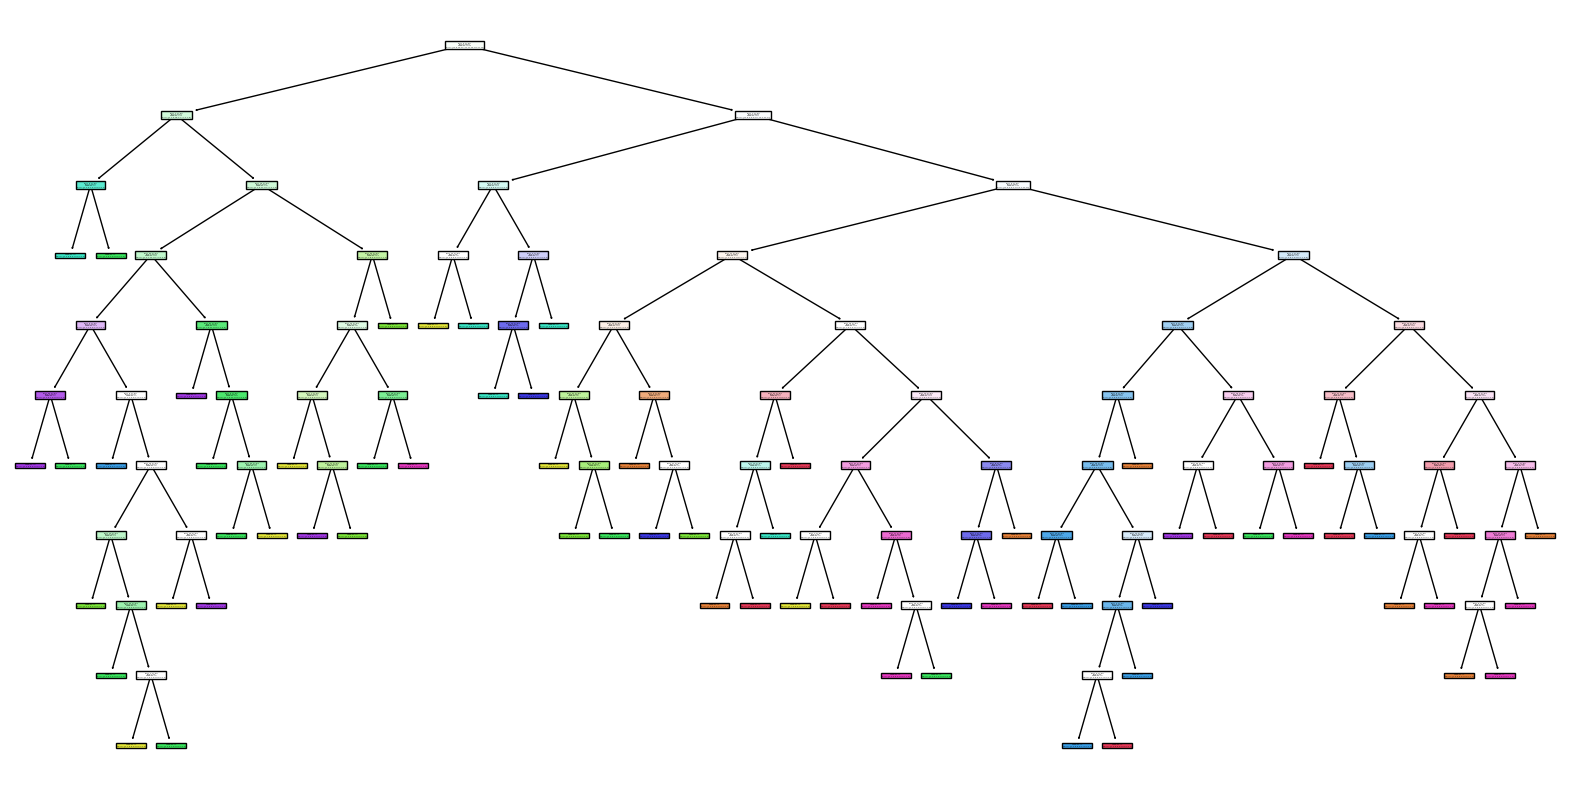

In [7]:
max_depth = 9
clf = DecisionTreeClassifier()

clf.fit(X, y)

print("train score", clf.score(X_train, y_train))
print("test score", (clf.score(X_test, y_test)))

# print the number of nodes in the tree
print(f"Number of nodes in the tree: {clf.tree_.node_count}")
# print the depth of the tree
print(f"Depth of the tree: {clf.tree_.max_depth}")
# print the tree structure
print(clf.tree_)


# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=[f"pixel_{i}" for i in range(25)])
plt.show()

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [9]:
%reload_ext autoreload
%autoreload 2
from hdlTree import node, test, generate_verilog

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
# while len(stack) > 0:
#     # `pop` ensures each node is only visited once
#     node_id, depth = stack.pop()
#     node_depth[node_id] = depth

#     # If the left and right child of a node is not the same we have a split
#     # node
#     is_split_node = children_left[node_id] != children_right[node_id]
#     # If a split node, append left and right children and depth to `stack`
#     # so we can loop through them
#     if is_split_node:
#         stack.append((children_left[node_id], depth + 1))
#         stack.append((children_right[node_id], depth + 1))
#     else:
#         is_leaves[node_id] = True

# print(
#     "The binary tree structure has {n} nodes and has "
#     "the following tree structure:\n".format(n=n_nodes)
# )
# for i in range(n_nodes):
#     if is_leaves[i]:
#         print(
#             "{space}node={node} is a leaf node with value={value}.".format(
#             # "{space}node={node} is a leaf node  {value}".format(
#                 space=node_depth[i] * "\t", node=i, value=np.argmax(values[i])
#             )
#         )
#     else:
#         print(
#             "{space}node={node} is a split node with value={value}: "
#             # "{space}node={node} "
#             "go to node {left} if X[:, {feature}] <= {threshold} "
#             "else to node {right}.".format(
#                 space=node_depth[i] * "\t",
#                 node=i,
#                 left=children_left[i],
#                 feature=feature[i],
#                 threshold=threshold[i],
#                 right=children_right[i],
#                 value=values[i],
#             )
#         )

def build_hdl_tree(tree, node_id=0):
    if tree.children_left[node_id] == tree.children_right[node_id]:
        # return node.LeafNode(tree.value[node_id])
        return node(None, None, None, class_=np.argmax(tree.value[node_id]), isLeaf=True)
    else:
        yes = build_hdl_tree(tree, tree.children_left[node_id])
        no = build_hdl_tree(tree, tree.children_right[node_id])
        # return node.SplitNode(tree.feature[node_id], tree.threshold[node_id], left, right)
        return node(None, None, None, index=tree.feature[node_id], child_no=no, child_yes=yes, isLeaf=False)

root = build_hdl_tree(clf.tree_)
# print(root)
# root.print_tree()
index = 2
x_ = X_test[index]
y_ = y_test[index]
print(x_)
print(y_)
res = test( x_, root, str(y_))
    
print(res)
print(f"{res:b} == {y_:b}")

[True, True, True, True, False, False, False, True, True, False, False, False, True, True, False, False, False, True, True, False, False, False, False, False, False]
7
7
111 == 111


In [10]:
# test the entire dataset
import tqdm
correct = 0
for i, (x, y) in tqdm.tqdm(enumerate(zip(X_test, y_test)), total=len(X_test)):
    res = test(x, root, "vcdTest/"+str(y)+"_"+str(i))
    y_ = clf.predict([x])[0]
    if res == y:
        correct += 1
    else:
        print(f"Error: {res} != {y}")
print(f"Accuracy: {correct/len(X_test)}")


100%|██████████| 27/27 [00:00<00:00, 55.69it/s]

Accuracy: 1.0


In [11]:
#generate verilog code
generate_verilog(root, "../tree.v")
